In [1]:
from shapely.geometry import Point, mapping, LineString
import geopandas as gpd
import pandas as pd
import folium
from folium import PolyLine
from folium.plugins import MarkerCluster, Fullscreen
from folium.features import CustomIcon
from branca.element import MacroElement
from jinja2 import Template
import matplotlib.cm as cm
import matplotlib.colors as colors
import numpy as np
from folium.features import GeoJsonTooltip
from folium.features import GeoJson
from shapely import wkt
import matplotlib.pyplot as plt

In [2]:
snapelders2019_df = pd.read_csv('B22001_2019_older_than_60.csv')

In [3]:
snapelders2020_df = pd.read_csv('B22001_2020_older_than_60.csv')

In [4]:
snapelders2021_df = pd.read_csv('B22001_2021_older_than_60.csv')

In [5]:
snapelders2022_df = pd.read_csv('B22001_2022_older_than_60.csv')

In [6]:
snapelders2023_df = pd.read_csv('B22001_2023_older_than_60.csv')

In [7]:
dfs = [snapelders2019_df, snapelders2020_df, snapelders2021_df, snapelders2022_df, snapelders2023_df]

In [8]:
#tried making a loop to filter out columns with 'Margin' and clean up titles and renaming some rows
for df in dfs:
    columns_to_drop = [col for col in df.columns if 'Margin' in str(col)]
    df.drop(columns=columns_to_drop, inplace=True)

    df.columns = [col.replace('!!Estimate', '').replace(', West Virginia', '') for col in df.columns]

    df.loc[2, "Label (Grouping)"] = "SNAP households w over 60"
    df.loc[3, "Label (Grouping)"] = "SNAP number of over 60"

In [9]:
snapelders2019_df = snapelders2019_df.melt(id_vars=[snapelders2019_df.columns[0]], var_name='County', value_name = '2019')

In [10]:
snapelders2020_df = snapelders2020_df.melt(id_vars=[snapelders2020_df.columns[0]], var_name='County', value_name = '2020')

In [11]:
snapelders2021_df = snapelders2021_df.melt(id_vars=[snapelders2021_df.columns[0]], var_name='County', value_name = '2021')

In [12]:
snapelders2022_df = snapelders2022_df.melt(id_vars=[snapelders2022_df.columns[0]], var_name='County', value_name = '2022')

In [13]:
snapelders2023_df = snapelders2023_df.melt(id_vars=[snapelders2023_df.columns[0]], var_name='County', value_name = '2023')

In [14]:
dfs = [snapelders2019_df, snapelders2020_df, snapelders2021_df, snapelders2022_df, snapelders2023_df]

In [15]:
merged_df = dfs[0]

In [16]:
for i, df in enumerate(dfs):
    dfs[i] = df.set_index(['Label (Grouping)', 'County'])

In [17]:
merged_df = pd.concat(dfs, axis=1)

In [18]:
merged_df = merged_df.reset_index()

In [19]:
snapelders_df = merged_df

In [20]:
snapelders_df.head()

,Label (Grouping),County,2019,2020,2021,2022,2023
0,Total:,West Virginia,"732,585","734,235","711,352","716,040","721,448"
1,Household received Food Stamps/SNAP in the...,West Virginia,"123,277","121,292","116,700","119,104","123,756"
2,SNAP households w over 60,West Virginia,"40,944","42,068","42,666","45,351","47,122"
3,SNAP number of over 60,West Virginia,"82,333","79,224","74,034","73,753","76,634"
4,Household did not receive Food Stamps/SNAP...,West Virginia,"609,308","612,943","594,652","596,936","597,692"


In [21]:
#cleaned only columns with object (string) types
str_cols = snapelders_df.select_dtypes(include='object').columns

In [22]:
#cleaned and normalized whitespace in each string column 
for col in str_cols:
    snapelders_df[col] = snapelders_df[col].astype(str).apply(lambda x: ' '.join(x.split()))

In [23]:
#cleaned column whitespaces
snapelders_df.columns = snapelders_df.columns.str.strip()

In [24]:
#checked data
print(snapelders_df['Label (Grouping)'].unique())

['Total:' 'Household received Food Stamps/SNAP in the past 12 months:'
 'SNAP households w over 60' 'SNAP number of over 60'
 'Household did not receive Food Stamps/SNAP in the past 12 months:'
 'At least one person in household 60 years or over'
 'No people in household 60 years or over']


In [25]:
for col in ['2019', '2020', '2021', '2022', '2023']:
    snapelders_df[col] = snapelders_df[col].replace({',': ''}, regex=True).astype(int)

In [26]:
#filtered for data elderly numbers
#first row is adults over 60 from  Household that received Food Stamps/SNAP in the past 12 months:
row = snapelders_df[
    snapelders_df['Label (Grouping)'].str.contains("SNAP number of over 60", case=False, na=False) &
    (snapelders_df['County'] == 'West Virginia')
]
row

,Label (Grouping),County,2019,2020,2021,2022,2023
3,SNAP number of over 60,West Virginia,82333,79224,74034,73753,76634


In [27]:
years = ['2019', '2020', '2021', '2022', '2023']
values = row[years].values.flatten().astype(int)

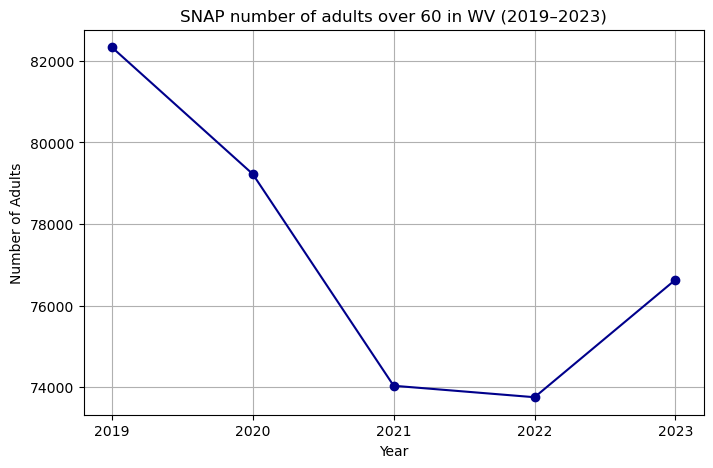

In [28]:
plt.figure(figsize=(8, 5))
plt.plot(years, values, marker='o', color='darkblue')
plt.title("SNAP number of adults over 60 in WV (2019–2023)")
plt.xlabel("Year")
plt.ylabel("Number of Adults")
plt.grid(True)

In [29]:
snapelders_df.head(50)

,Label (Grouping),County,2019,2020,2021,2022,2023
0,Total:,West Virginia,732585,734235,711352,716040,721448
1,Household received Food Stamps/SNAP in the pas...,West Virginia,123277,121292,116700,119104,123756
2,SNAP households w over 60,West Virginia,40944,42068,42666,45351,47122
3,SNAP number of over 60,West Virginia,82333,79224,74034,73753,76634
4,Household did not receive Food Stamps/SNAP in ...,West Virginia,609308,612943,594652,596936,597692
5,At least one person in household 60 years or over,West Virginia,290133,296613,290382,292646,293799
6,No people in household 60 years or over,West Virginia,319175,316330,304270,304290,303893
7,Total:,Barbour County,6324,6484,5813,5789,5871
8,Household received Food Stamps/SNAP in the pas...,Barbour County,1062,1114,892,921,979
9,SNAP households w over 60,Barbour County,404,388,293,360,328


In [30]:
wv_total_df = pd.read_csv('wv_total_data.csv')

In [31]:
wv_total_df = wv_total_df.loc[:, ~wv_total_df.columns.str.contains("County", case=False)]

In [32]:
wv_total_df

,Label (Grouping),West Virginia!!Total!!Estimate,West Virginia!!Total!!Margin of Error,West Virginia!!60 years and over!!Estimate,West Virginia!!60 years and over!!Margin of Error
0,Total population,"1,784,462",*****,"497,318","±2,100"
1,SEX AND AGE,NaN,NaN,NaN,NaN
2,Male,49.9%,±0.1,46.6%,±0.2
3,Female,50.1%,±0.1,53.4%,±0.2
4,Median age (years),42.7,±0.1,70.0,±0.2
...,...,...,...,...,...
122,GROSS RENT AS A PERCENTAGE OF HOUSEHOLD IN...,NaN,NaN,NaN,NaN
123,Less than 30 percent,60.2%,±1.0,60.2%,±1.7
124,30 percent or more,39.8%,±1.0,39.8%,±1.7
125,GROSS RENT,NaN,NaN,NaN,NaN


In [33]:
wv_total_df = wv_total_df.loc[:, ~wv_total_df.columns.str.contains("Margin", case=False)]

In [34]:
wv_total_df

,Label (Grouping),West Virginia!!Total!!Estimate,West Virginia!!60 years and over!!Estimate
0,Total population,"1,784,462","497,318"
1,SEX AND AGE,NaN,NaN
2,Male,49.9%,46.6%
3,Female,50.1%,53.4%
4,Median age (years),42.7,70.0
...,...,...,...
122,GROSS RENT AS A PERCENTAGE OF HOUSEHOLD IN...,NaN,NaN
123,Less than 30 percent,60.2%,60.2%
124,30 percent or more,39.8%,39.8%
125,GROSS RENT,NaN,NaN


In [35]:
row

,Label (Grouping),County,2019,2020,2021,2022,2023
3,SNAP number of over 60,West Virginia,82333,79224,74034,73753,76634


In [36]:
rowkids_df = pd.read_csv('rowkids.csv')

In [37]:
df1 = rowkids_df.set_index('Label (Grouping)').loc[['SNAP children under 18']]
df2 = row.set_index('Label (Grouping)').loc[['SNAP number of over 60']]

In [38]:
df1 = df1.drop(columns=['County'])
df2 = df2.drop(columns=['County'])

In [39]:
combined = pd.DataFrame({
    'Year': df1.columns.astype(int),
    'Children under 18': df1.values.flatten().astype(int),
    'Over 60': df2.values.flatten().astype(int)
})

In [40]:
x = np.arange(len(combined['Year']))
width = 0.35

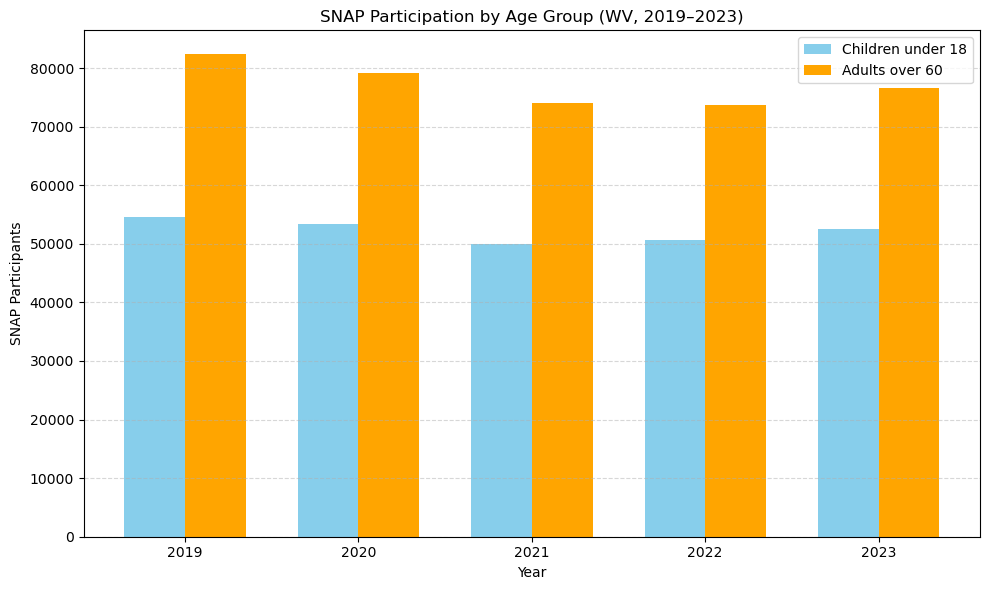

In [41]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x - width/2, combined['Children under 18'], width, label='Children under 18', color='skyblue')
ax.bar(x + width/2, combined['Over 60'], width, label='Adults over 60', color='orange')

ax.set_xticks(x)
ax.set_xticklabels(combined['Year'])
ax.set_xlabel('Year')
ax.set_ylabel('SNAP Participants')
ax.set_title('SNAP Participation by Age Group (WV, 2019–2023)')
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()